Scirpy Tutorial from https://icbi-lab.github.io/scirpy/latest/tutorials/tutorial_3k_tcr.html 

0. Setup

In [15]:
import numpy as np
import pandas as pd
import scanpy as sc
import scirpy as ir
from matplotlib import pyplot as plt, cm as mpl_cm
from cycler import cycler

sc.set_figure_params(figsize=(4, 4))
sc.settings.verbosity = 2  # verbosity: errors (0), warnings (1), info (2), hints (3)

In [16]:
sc.logging.print_header()

scanpy==1.8.2 anndata==0.7.8 umap==0.5.2 numpy==1.20.3 scipy==1.7.3 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.13.1 python-igraph==0.9.9 pynndescent==0.5.5


1. Preparing the data

The dataset ships with the scirpy package. We can conveniently load it from the scirpy.datasets module.

In [17]:
#adata = ir.datasets.wu2020() # 10K 
adata = ir.datasets.wu2020_3k() # 3k
adata.shape

try downloading from url
https://github.com/icbi-lab/scirpy/releases/download/d0.1.0/wu2020_3k.h5ad
... this may take a while but only happens once


100%|██████████| 16.0M/16.0M [00:04<00:00, 3.80MB/s]


(3000, 30727)

In [18]:
adata.obs

,cluster_orig,patient,sample,source,clonotype_orig,multi_chain,IR_VJ_1_locus,IR_VJ_2_locus,IR_VDJ_1_locus,IR_VDJ_2_locus,...,IR_VJ_2_c_call,IR_VDJ_1_c_call,IR_VDJ_2_c_call,IR_VJ_1_junction,IR_VJ_2_junction,IR_VDJ_1_junction,IR_VDJ_2_junction,has_ir,batch,extra_chains
LN1_GTAGGCCAGCGTAGTG-1-19,4.4-FOS,Lung1,LN1,NAT,lung1.tn.C223,False,nan,nan,TRB,TRB,...,nan,TRBC2,TRBC2,None,None,TGTGCCAGCAGCTTAATGCGGCTAGCGGGAGATACGCAGTATTTT,TGTGCAAGTCGCTTAGCGGTTTTATCGACTAGCGGGAGTGTCGGAG...,True,19,NaN
RN2_AGAGCGACAGATTGCT-1-27,4.4-FOS,Renal2,RN2,NAT,renal2.tnb.C1362,False,TRA,nan,TRB,nan,...,nan,TRBC1,nan,TGTGCTGTGAGGGGGAATAACAATGCCAGACTCATGTTT,None,TGTGCCAGCAGCTTTGGAACGGTGGCTGAAGCTTTCTTT,None,True,27,NaN
LN1_GTCATTTCAATGAAAC-1-19,8.2-Tem,Lung1,LN1,NAT,lung1.tn.C25,False,TRA,nan,TRB,nan,...,nan,TRBC1,nan,TGTGCTGTGAGGTTGGGTAACCAGTTCTATTTT,None,TGCAGTGCTAGAGATGGAGGGGGGGGGAACACTGAAGCTTTCTTT,None,True,19,NaN
LN2_GACACGCAGGTAGCTG-2-2,8.6-KLRB1,Lung2,LN2,NAT,lung2.tn.C2452,False,nan,nan,TRB,nan,...,nan,TRBC2,nan,None,None,TGTGCCAGCAGCCAAGGTCAGGGACAGGATTTTAACTACGAGCAGT...,None,True,2,NaN
LN2_GCACTCTCAGGGATTG-2-2,4.4-FOS,Lung2,LN2,NAT,lung2.tn.C5631,False,TRA,nan,TRB,nan,...,nan,TRBC1,nan,TGTGCAGCAAGCGACCCCACGGTCGAGGCAGGAACTGCTCTGATCTTT,None,TGTGCCAGCAGCTTGACCGTTAACACTGAAGCTTTCTTT,None,True,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RT3_GCAGTTAGTATGAAAC-1-6,4.2-RPL32,Renal3,RT3,Tumor,renal3.tnb.C176,False,TRA,nan,TRB,nan,...,nan,TRBC2,nan,TGTGCTGCGATGGATAGCAACTATCAGTTAATCTGG,None,TGTGCCACCAAGGACAGGGAAGACACCGGGGAGCTGTTTTTT,None,True,6,NaN
LT1_GACGTGCTCTCAAGTG-1-24,8.2-Tem,Lung1,LT1,Tumor,lung1.tn.C151,False,TRA,nan,nan,nan,...,nan,nan,nan,TGTGCTTATAGGAGTTCCCTTGGTGGTGCTACAAACAAGCTCATCTTT,None,None,None,True,24,NaN
ET3_GCTGGGTAGACCTTTG-1-3,3.1-MT,Endo3,ET3,Tumor,endo3.tn.C76,False,nan,nan,TRB,nan,...,nan,TRBC2,nan,None,None,TGTGCCAGCAGCCGGACAGGGGGGGATTCCGGGGAGCTGTTTTTT,None,True,3,NaN
RT1_TAAGAGATCCTTAATC-1-8,4.5-IL6ST,Renal1,RT1,Tumor,renal1.tnb.C83,False,TRA,nan,TRB,nan,...,nan,TRBC2,nan,TGTGCAATGAGCGAGATTTCTGGTGGCTACAATAAGCTGATTTTT,None,TGTGCCTGGAGTGACAGGTCAGACGAGCAGTACTTC,None,True,8,NaN


Preprocess Transcriptomics data
Transcriptomics data needs to be filtered and preprocessed as with any other single-cell dataset. We recommend following the scanpy tutorial and the best practice paper by Luecken et al.. For the Wu et al. (2020) dataset, the authors already provide clusters and UMAP coordinates. Instead of performing clustering and cluster annotation ourselves, we will just use provided data. The clustering and annotation procedure used by the authors is described in their paper.

In [19]:
sc.pp.filter_genes(adata, min_cells=10)
sc.pp.filter_cells(adata, min_genes=100)

filtered out 18877 genes that are detected in less than 10 cells


In [20]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1000)
sc.pp.log1p(adata)

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [21]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1000)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="cell_ranger", n_top_genes=5000)
sc.tl.pca(adata)
sc.pp.neighbors(adata)

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:00)


For the Wu2020 dataset, the authors already provide clusters and UMAP coordinates. Instead of performing clustering and cluster annotation ourselves, we will just use the provided data. The clustering and annotation methodology is described in their paper.

In [22]:
adata.obsm["X_umap"] = adata.obsm["X_umap_orig"]

In [23]:
mapping = {
    "3.1-MT": "other",
    "4.1-Trm": "CD4_Trm",
    "4.2-RPL32": "CD4_RPL32",
    "4.3-TCF7": "CD4_TCF7",
    "4.4-FOS": "CD4_FOSS",
    "4.5-IL6ST": "CD4_IL6ST",
    "4.6a-Treg": "CD4_Treg",
    "4.6b-Treg": "CD4_Treg",
    "8.1-Teff": "CD8_Teff",
    "8.2-Tem": "CD8_Tem",
    "8.3a-Trm": "CD8_Trm",
    "8.3b-Trm": "CD8_Trm",
    "8.3c-Trm": "CD8_Trm",
    "8.4-Chrom": "other",
    "8.5-Mitosis": "other",
    "8.6-KLRB1": "other",
    "nan": "nan",
}
adata.obs["cluster"] = [mapping[x] for x in adata.obs["cluster_orig"]]

Let's inspect the UMAP plots. The first three panels show the UMAP plot colored by sample, patient and cluster. We don't observe any clustering of samples or patients that could hint at batch effects.

The last three panels show the UMAP colored by the T cell markers CD8, CD4, and FOXP3. We can confirm that the markers correspond to their respective cluster labels.

/Users/danhudson/opt/miniconda3/envs/scanpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'cluster' as categorical


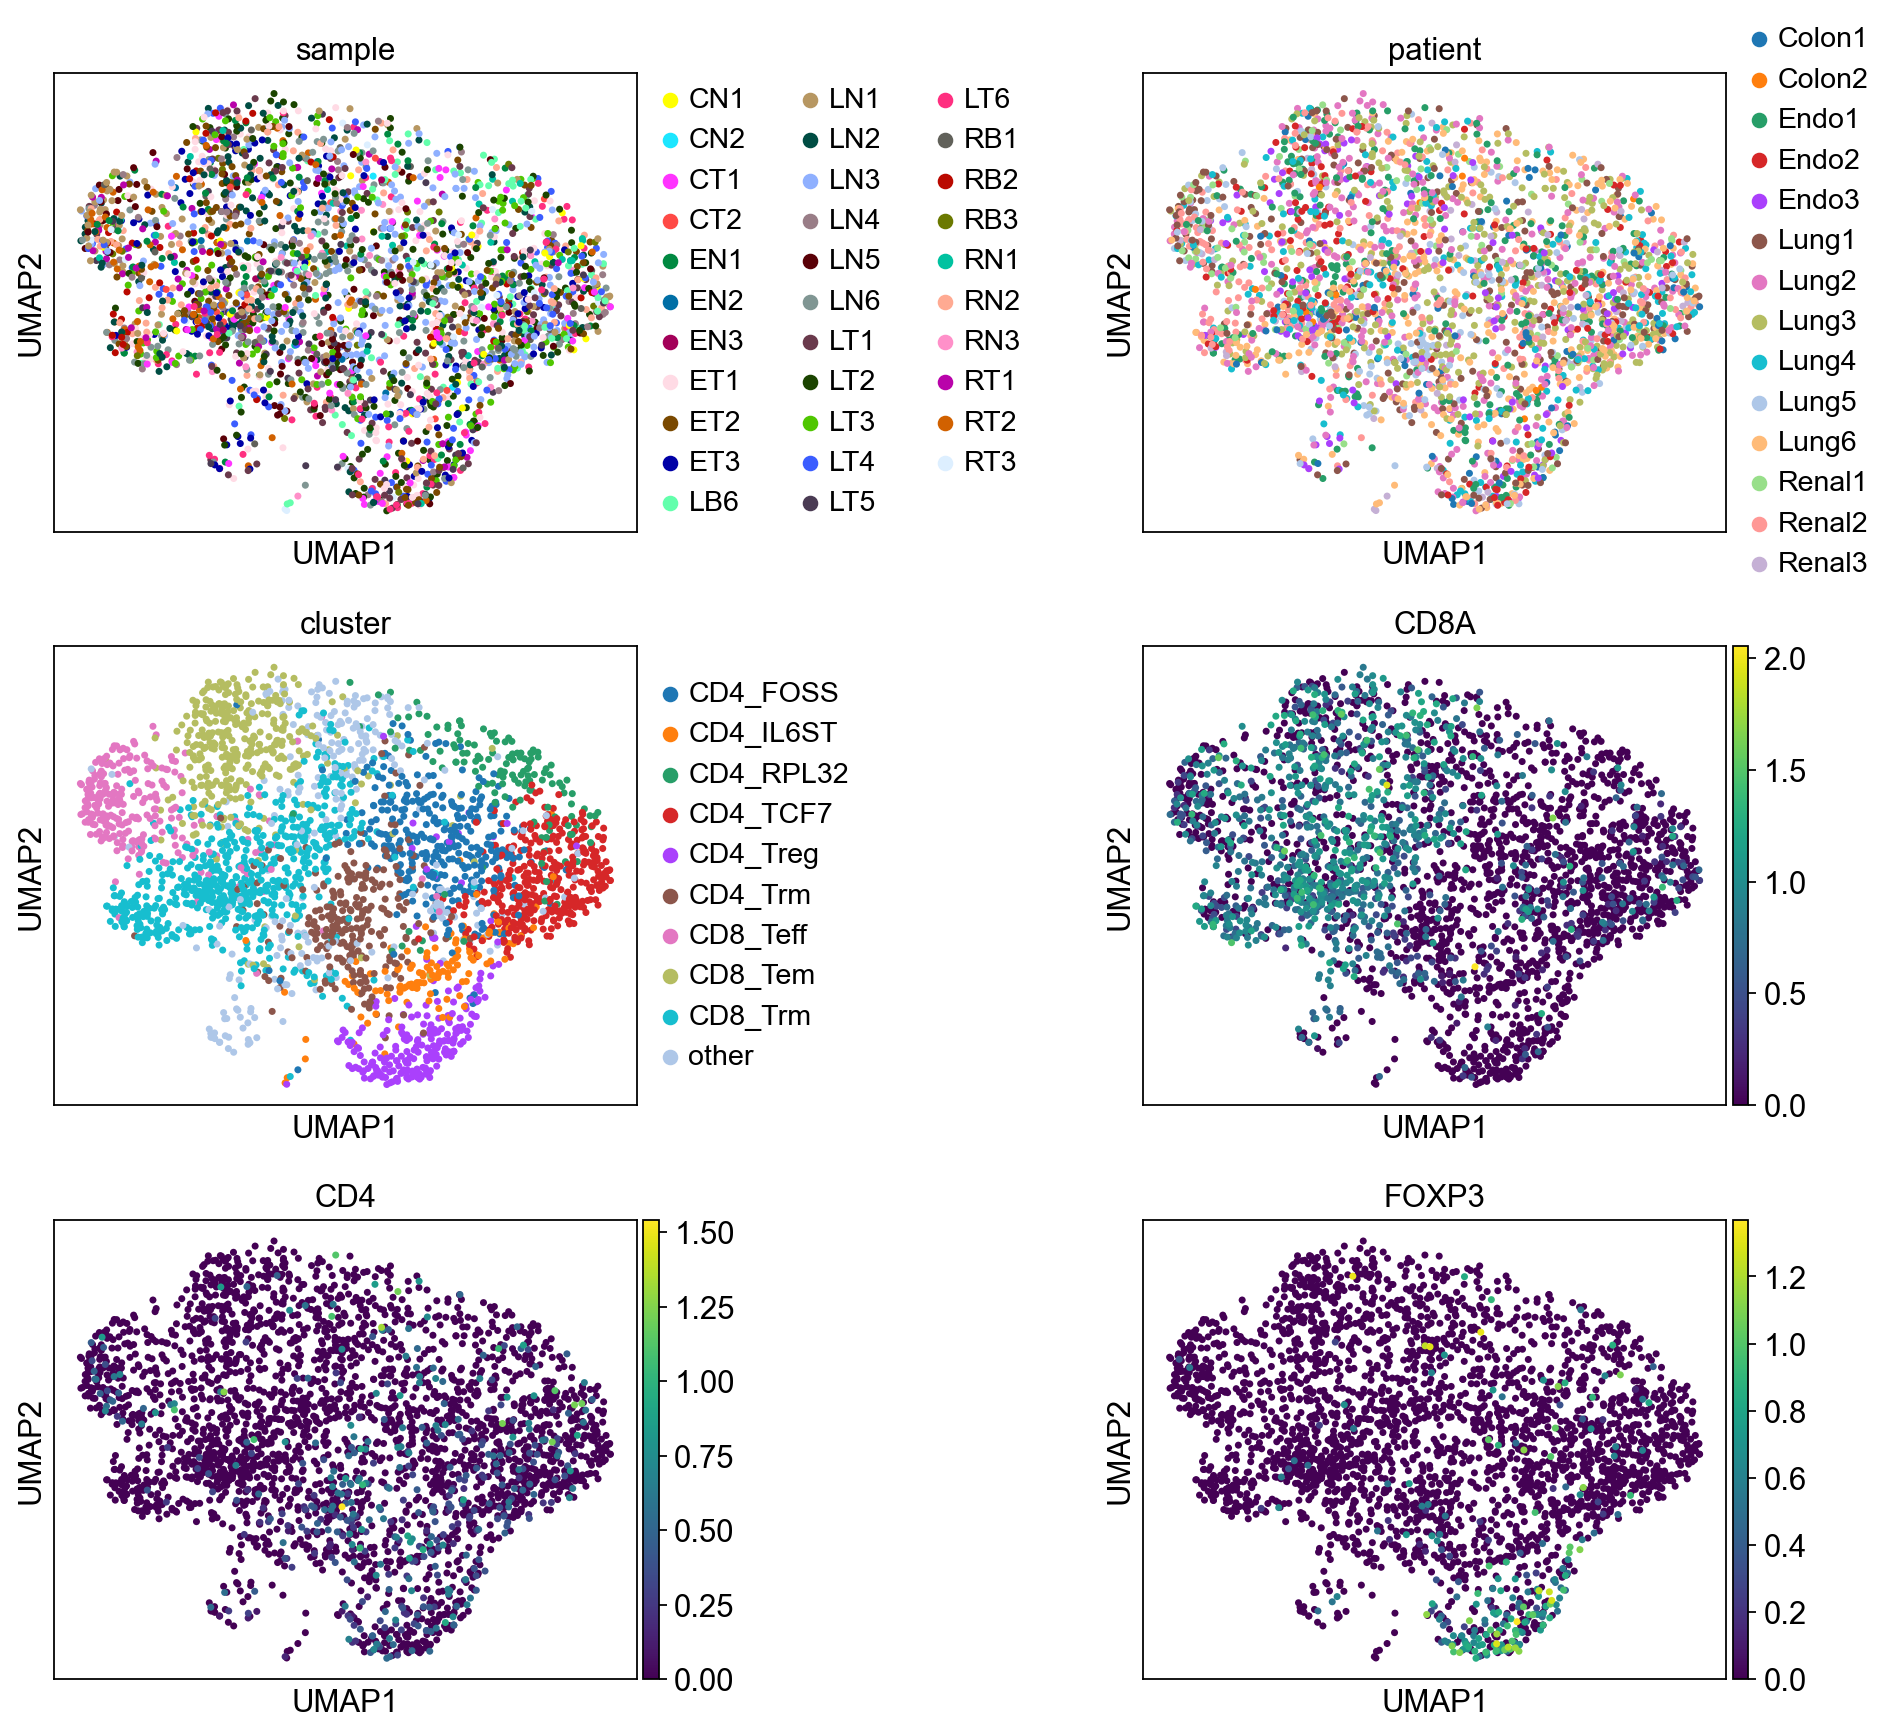

In [24]:
sc.pl.umap(
    adata,
    color=["sample", "patient", "cluster", "CD8A", "CD4", "FOXP3"],
    ncols=2,
    wspace=0.7,
)

TCR Quality Control
While most of T cell receptors have exactly one pair of α and β chains, up to one third of T cells can have dual TCRs, i.e. two pairs of receptors originating from different alleles (Schuldt et al (2019)).

Using the scirpy.tl.chain_pairing function, we can add a summary about the T cell receptor compositions to adata.obs.

Orphan chain refers to cells that have either a single alpha or beta receptor chain.
Extra chain refers to cells that have a full alpha/beta receptor pair, and an additional chain.
Multichain refers to cells with more than two receptor pairs detected. These cells are likely doublets.

In [25]:
ir.tl.chain_qc(adata)

/Users/danhudson/opt/miniconda3/envs/scanpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'receptor_type' as categorical
/Users/danhudson/opt/miniconda3/envs/scanpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'receptor_subtype' as categorical
/Users/danhudson/opt/miniconda3/envs/scanpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categ

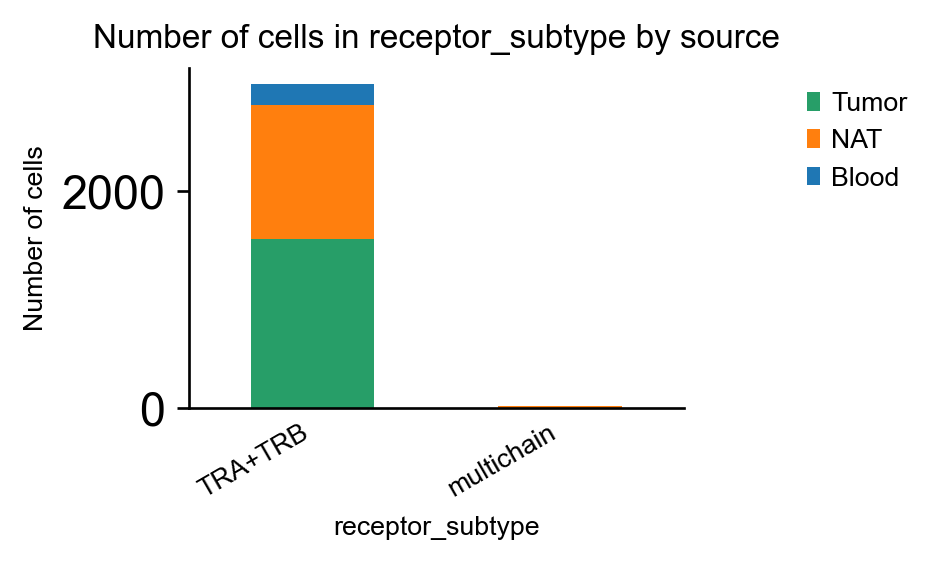

In [26]:
ax = ir.pl.group_abundance(adata, groupby="receptor_subtype", target_col="source")

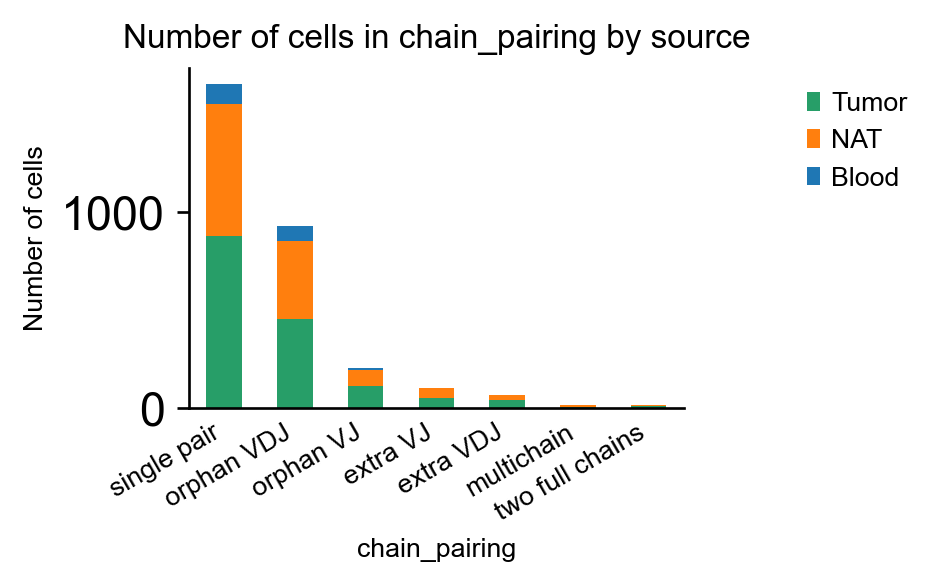

In [27]:
ax = ir.pl.group_abundance(adata, groupby="chain_pairing", target_col="source")

In [28]:
print(
    "Fraction of cells with more than one pair of TCRs: {:.2f}".format(
        np.sum(
            adata.obs["chain_pairing"].isin(
                ["extra VJ", "extra VDJ", "two full chains"]
            )
        )
        / adata.n_obs
    )
)

Fraction of cells with more than one pair of TCRs: 0.06


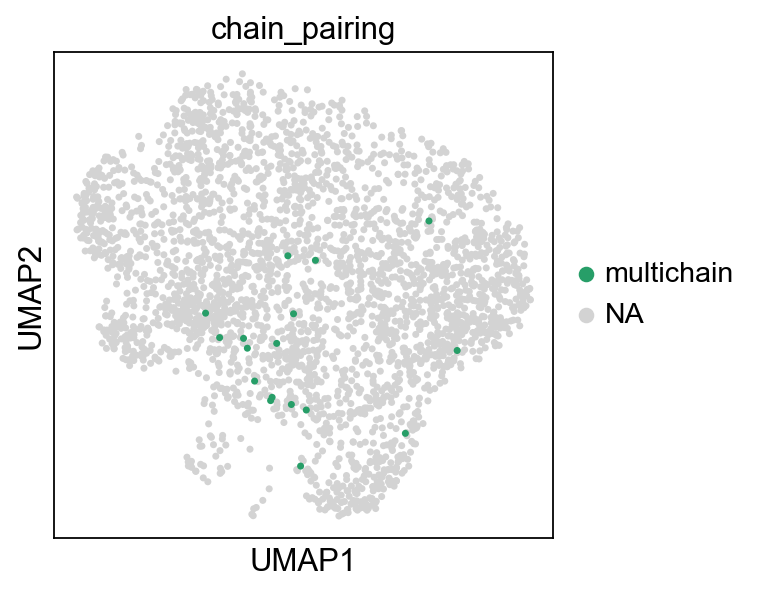

In [29]:
sc.pl.umap(adata, color="chain_pairing", groups="multichain")

In [30]:
# Drop multichain instances
adata = adata[adata.obs["chain_pairing"] != "multichain", :].copy()

In [31]:
# Drop single chain instances
adata = adata[~adata.obs["chain_pairing"].isin(["orphan VDJ", "orphan VJ"]), :].copy()

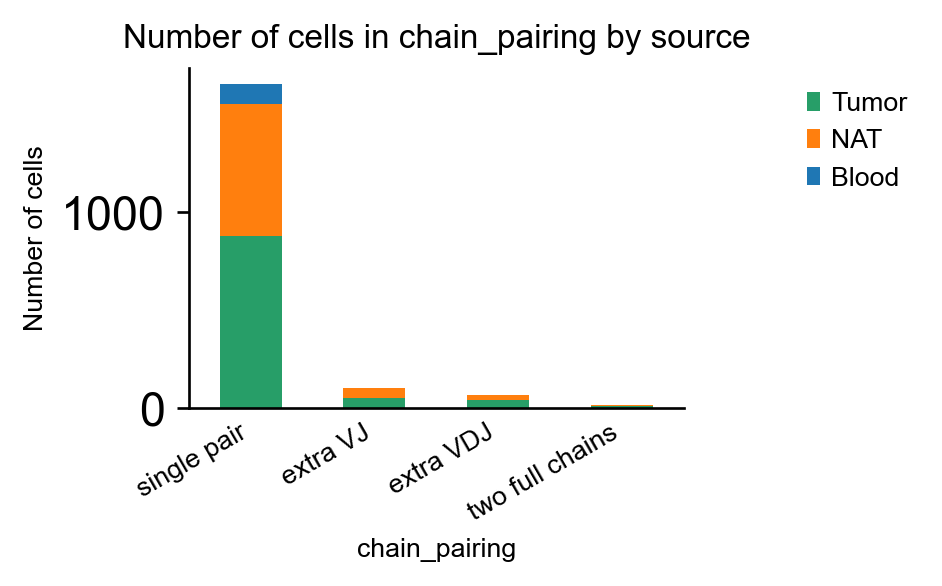

In [32]:
ax = ir.pl.group_abundance(adata, groupby="chain_pairing", target_col="source")

Compute CDR3 neighborhood graph and define clonotypes
scirpy.pp.ir_dist() computes distances between CDR3 nucleotide (nt) or amino acid (aa) sequences, either based on sequence identity or similarity. It creates two distance matrices: one for all unique VJ sequences and one for all unique VDJ sequences. The distance matrices are added to adata.uns.

The function scirpy.tl.define_clonotypes() matches cells based on the distances of their VJ and VDJ CDR3-sequences and value of the function parameters dual_ir and receptor_arms. Finally, it detects connected modules in the graph and annotates them as clonotypes. This will add a clone_id and clone_id_size column to adata.obs.

The dual_ir parameter defines how scirpy handles cells with more than one pair of receptors. The default value is any which implies that cells with any of their primary or secondary receptor chain matching will be considered to be of the same clonotype.

Here, we define clonotypes based on nt-sequence identity. In a later step, we will define clonotype clusters based on amino-acid similarity.

In [33]:
# using default parameters, `ir_dist` will compute nucleotide sequence identity
ir.pp.ir_dist(adata)
ir.tl.define_clonotypes(adata, receptor_arms="all", dual_ir="primary_only")

Computing sequence x sequence distance matrix for VJ sequences.
Computing sequence x sequence distance matrix for VDJ sequences.
Initializing lookup tables. 
Computing clonotype x clonotype distances.


100%|██████████| 1526/1526 [00:02<00:00, 706.08it/s]

Stored clonal assignments in `adata.obs["clone_id"]`.


To visualize the network we first call scirpy.tl.clonotype_network() to compute the layout. We can then visualize it using scirpy.pl.clonotype_network(). We recommend setting the min_cells parameter to >=2, to prevent the singleton clonotypes from cluttering the network.

In [34]:
ir.tl.clonotype_network(adata, min_cells=2)

The resulting plot is a network, where each dot represents cells with identical receptor configurations. As we define clonotypes as cells with identical CDR3-sequences, each dot is also a clonotype. For each clonotype, the numeric clonotype id is shown in the graph. The size of each dot refers to the number of cells with the same receptor configurations. Categorical variables can be visualized as pie charts.

/Users/danhudson/opt/miniconda3/envs/scanpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'clone_id' as categorical


<AxesSubplot:>

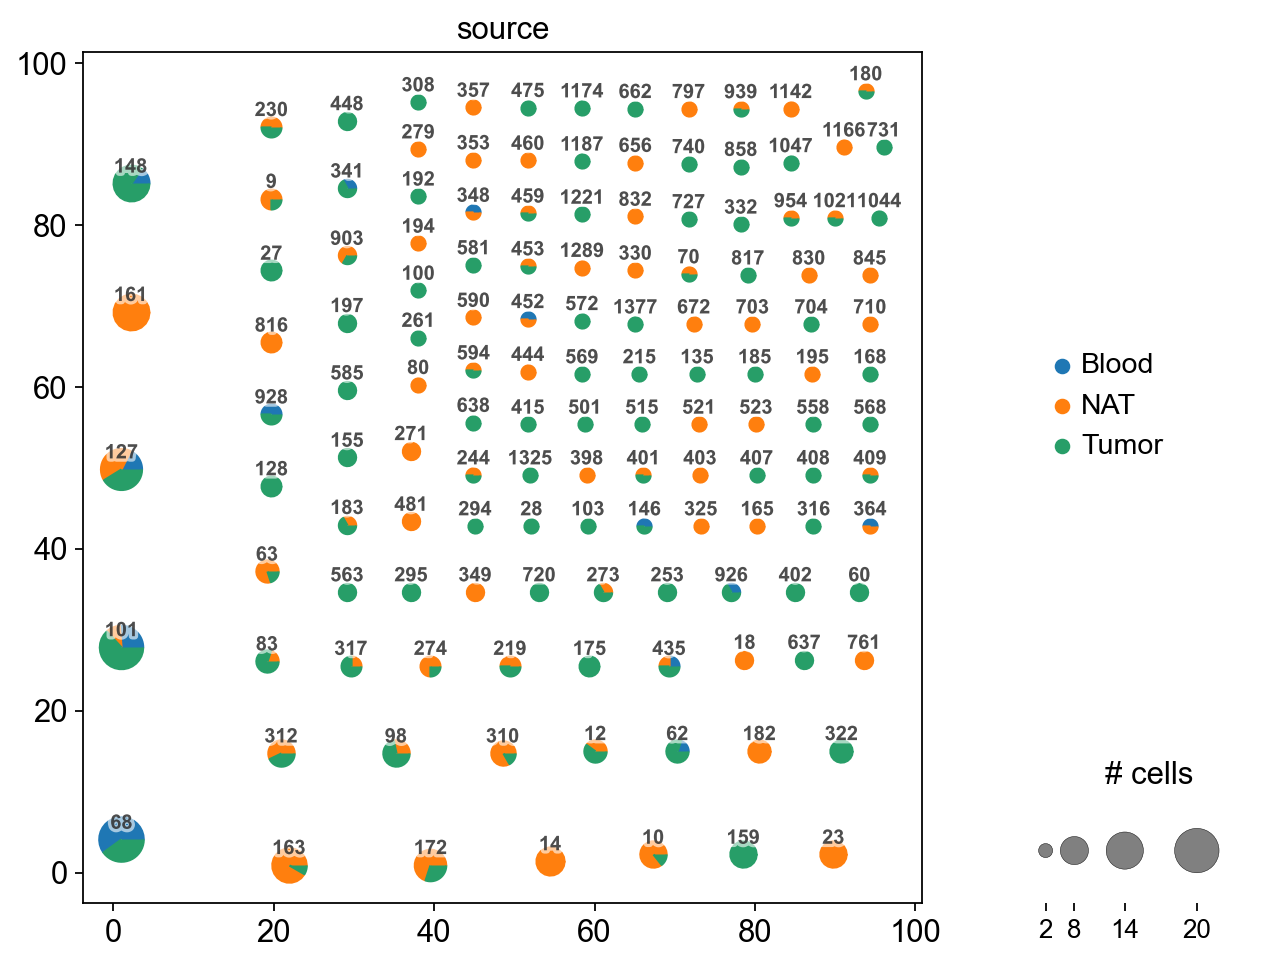

In [35]:
ir.pl.clonotype_network(
    adata, color="source", base_size=20, label_fontsize=9, panel_size=(7, 7)
)

Re-compute CDR3 neighborhood graph and define clonotype clusters
We can now re-compute the clonotype network based on amino-acid sequence similarity and define clonotype clusters.

To this end, we need to change set metric=”alignment” and specify a cutoff parameter. The distance is based on the BLOSUM62 matrix. For instance, a distance of 10 is equivalent to 2 R`s mutating into `N. This appoach was initially proposed as TCRdist by Dash et al. ([DFGH+17]).

All cells with a distance between their CDR3 sequences lower than cutoff will be connected in the network.

In [36]:
ir.pp.ir_dist(
    adata,
    metric="alignment",
    sequence="aa",
    cutoff=15,
)

Computing sequence x sequence distance matrix for VJ sequences.


100%|██████████| 496/496 [00:13<00:00, 36.33it/s]


Computing sequence x sequence distance matrix for VDJ sequences.


100%|██████████| 496/496 [00:13<00:00, 36.66it/s]


In [37]:
ir.tl.define_clonotype_clusters(
    adata, sequence="aa", metric="alignment", receptor_arms="all", dual_ir="any"
)

Initializing lookup tables. 
Computing clonotype x clonotype distances.


100%|██████████| 1549/1549 [00:06<00:00, 245.04it/s]


Stored clonal assignments in `adata.obs["cc_aa_alignment"]`.


In [40]:
ir.tl.clonotype_network(adata, min_cells=3, sequence="aa", metric="alignment")

Compared to the previous plot, we observere several connected dots. Each fully connected subnetwork represents a “clonotype cluster”, each dot still represents cells with identical receptor configurations.

The dots are colored by patient. We observe, that for instance, clonotypes 101 and 68 (left top and bottom) are private, i.e. they contain cells from a single patient only. On the other hand, clonotype 159 (left middle) is public, i.e. it is shared across patients Lung1 and Lung3.

<AxesSubplot:>

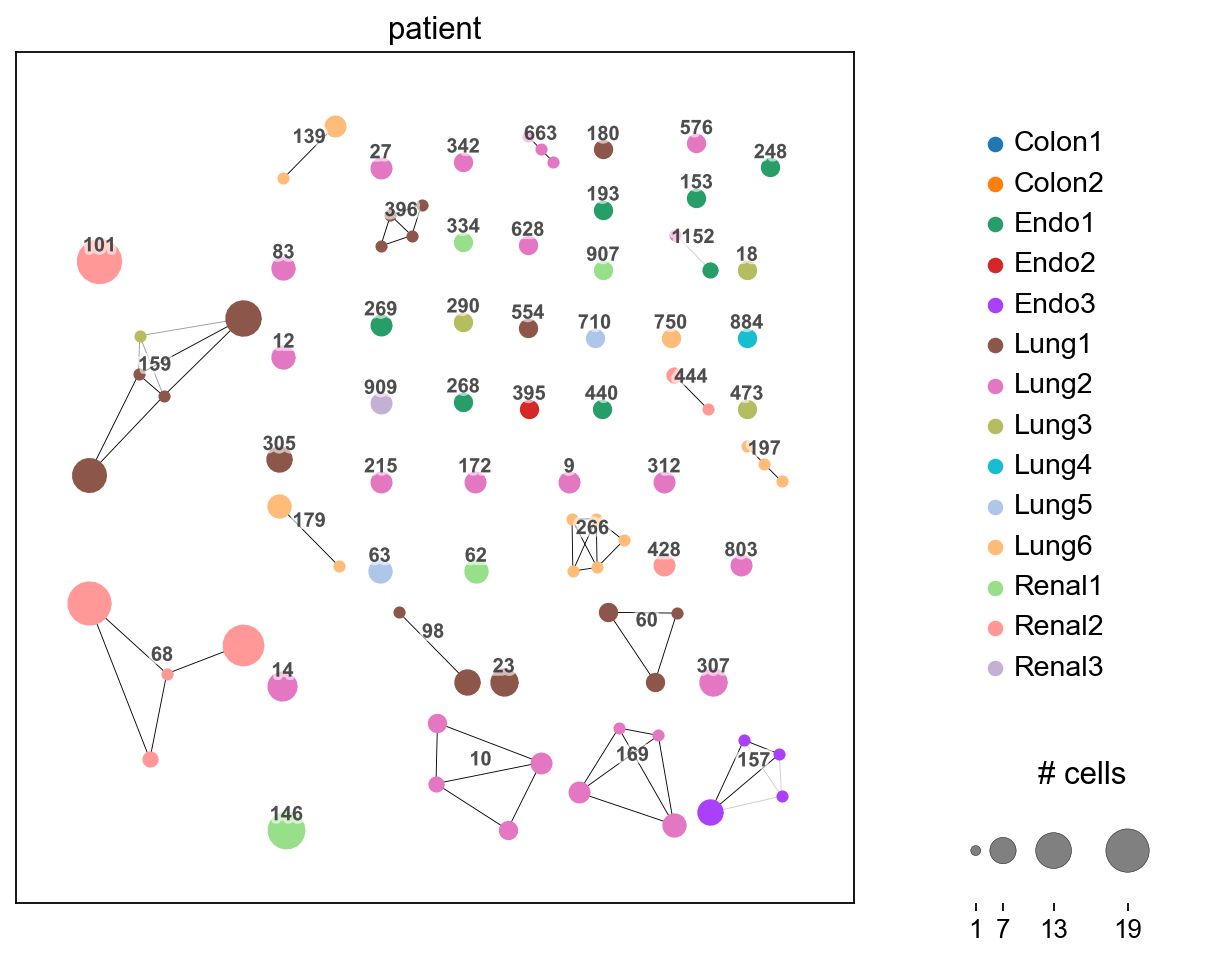

In [52]:
ir.pl.clonotype_network(
    adata, color="patient", label_fontsize=9, panel_size=(7, 7), base_size=20
)

We can now extract information (e.g. CDR3-sequences) from a specific clonotype cluster by subsetting AnnData. When extracting the CDR3 sequences of clonotype cluster 159, we retreive five different receptor configurations with different numbers of cells, corresponding to the five points in the graph.

In [53]:
adata.obs.loc[adata.obs["cc_aa_alignment"] == "159", :].groupby(
    [
        "IR_VJ_1_junction_aa",
        "IR_VJ_2_junction_aa",
        "IR_VDJ_1_junction_aa",
        "IR_VDJ_2_junction_aa",
        "receptor_subtype",
    ],
    observed=True,
).size().reset_index(name="n_cells")

,IR_VJ_1_junction_aa,IR_VJ_2_junction_aa,IR_VDJ_1_junction_aa,IR_VDJ_2_junction_aa,receptor_subtype,n_cells
0,CAGKSGNTGKLIF,None,CASSYQGATEAFF,None,TRA+TRB,12
1,CAGKSGNTGKLIF,CATDPRRSTGNQFYF,CASSYQGATEAFF,None,TRA+TRB,1
2,CATDPRRSTGNQFYF,None,CASSYQGATEAFF,None,TRA+TRB,11
3,CATDPRRSTGNQFYF,CAGKSGNTGKLIF,CASSYQGATEAFF,None,TRA+TRB,1
4,CAGKAGNTGKLIF,None,CASSYQGSTEAFF,None,TRA+TRB,1
